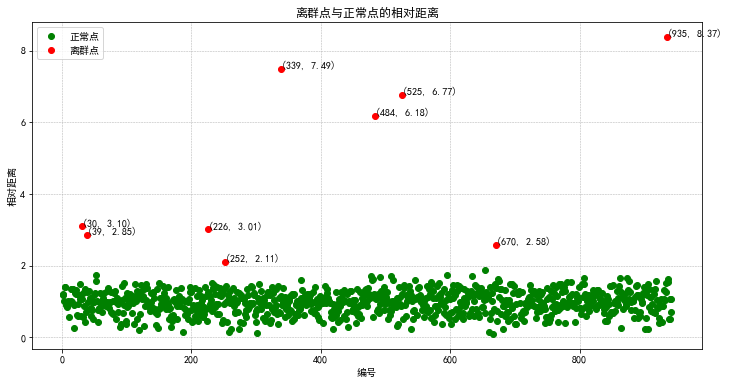

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 参数初始化
inputfile = '../data/consumption_data.xls'  # 销量及其他属性数据
k = 3  # 聚类的类别
threshold = 2  # 离散点阈值
iteration = 500  # 聚类最大循环次数
data = pd.read_excel(inputfile, index_col='Id')  # 读取数据
data_zs = 1.0*(data - data.mean())/data.std()  # 数据标准化

from sklearn.cluster import KMeans
model = KMeans(n_clusters=k, n_jobs=4, max_iter=iteration)  # 分为k类，并发数4
model.fit(data_zs)  # 开始聚类

# 标准化数据及其类别
r = pd.concat([data_zs, pd.Series(model.labels_, index=data.index)], axis=1)  # 每个样本对应的类别
r.columns = list(data.columns) + ['聚类类别']  # 重命名表头

norm = []
for i in range(k):  # 逐一处理
    norm_tmp = r[['R', 'F', 'M']][r['聚类类别'] == i] - model.cluster_centers_[i]
    norm_tmp = norm_tmp.apply(np.linalg.norm, axis=1)  # 求出绝对距离
    norm.append(norm_tmp / norm_tmp.median())  # 求相对距离并添加

norm = pd.concat(norm)  # 合并

# 设置图形大小，显示网格
plt.figure(figsize=(12, 6))  # 调整图表大小（长宽比可根据需要调整）

# 显示正常点和离群点
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
norm[norm <= threshold].plot(style='go', label='正常点')  # 正常点
discrete_points = norm[norm > threshold]  # 离群点
discrete_points.plot(style='ro', label='离群点')

# 离群点做标记
for i in range(len(discrete_points)):  # 离群点做标记
    id = discrete_points.index[i]
    n = discrete_points.iloc[i]
    plt.annotate('(%s, %0.2f)' % (id, n), xy=(id, n), xytext=(id, n))

# 设置图表标签及标题
plt.xlabel('编号')
plt.ylabel('相对距离')
plt.title('离群点与正常点的相对距离')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # 显示网格，虚线样式
plt.legend()  # 显示图例
plt.savefig('../tmp/离群点与正常点的相对距离图.png', dpi=1080)  # 保存图片
plt.show()

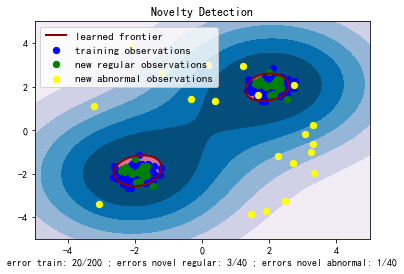

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))

# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]

# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]

# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# Fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)

# Predictions
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# Count errors
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# Plot the decision boundary
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

# Plot points
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='blue', s=40)
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green', s=40)
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='yellow', s=40)

# Set limits and labels
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers)
)

# Add legend
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.savefig('../tmp/Novelty Detection.png', dpi=1080)
plt.show()

In [3]:
import numpy as np
from sklearn.covariance import EllipticEnvelope
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# 生成训练数据
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X+2, X-2]
# 生成新用于测试的数据
X = 0.3 * np.random.randn(10, 2)
X_test = np.r_[X + 2, X - 2]
# 模型拟合
clf = EllipticEnvelope()
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print ("novelty detection result:\n",y_pred_test)

novelty detection result:
 [ 1  1 -1  1  1  1  1  1 -1  1  1  1 -1  1  1  1  1  1 -1  1]
